<a href="https://colab.research.google.com/github/maurosc3ner/ml_python_playground/blob/main/book_fchollet/dl_chollet_ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2

## Imports


In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
from tensorflow.keras.datasets import mnist



In [ ]:
(train_x,train_y), (test_x,test_y) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print(train_x.shape)
print(len(train_y))
print(train_y)

print(test_x.shape)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]
(10000, 28, 28)


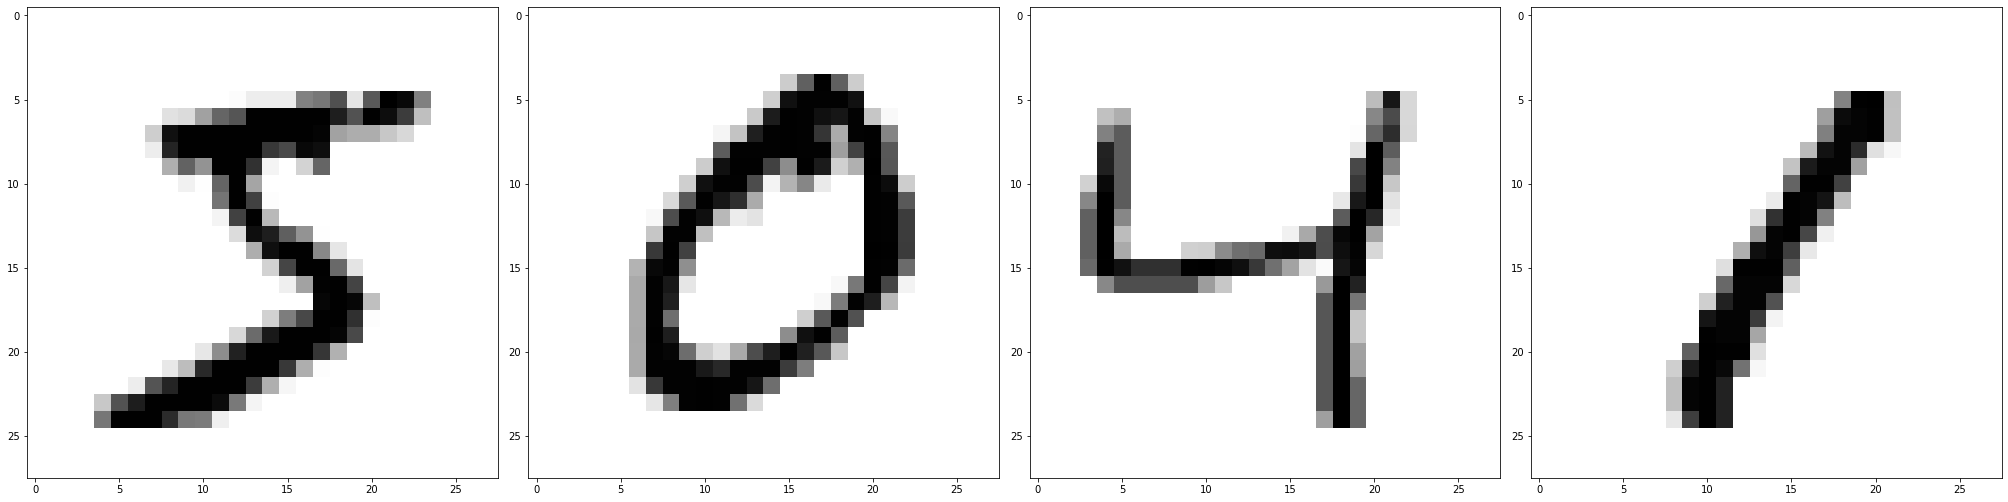

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 4, figsize=(28,28))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img, cmap=plt.cm.binary)
    plt.tight_layout()
    plt.show()

plotImages(train_x[:4])  # Plot images 0-4

In [ ]:
# let's convert to array
train_x = train_x.reshape(-1,28,28,1).astype('float32')/255
test_x = test_x.reshape(-1,28,28,1).astype('float32')/255

print(train_x.shape,test_x.shape)


(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
model1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(512,activation="relu",input_shape = (28, 28, 1)),
    tf.keras.layers.Dense(10, activation="softmax") 
])
model1.compile(optimizer='rmsprop',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1=model1.fit(train_x, 
           train_y, 
           epochs=5, batch_size=32,
           validation_data=[test_x, test_y],verbose=2)

Epoch 1/5
1875/1875 - 4s - loss: 0.0264 - accuracy: 0.9919 - val_loss: 0.0675 - val_accuracy: 0.9831 - 4s/epoch - 2ms/step
Epoch 2/5
1875/1875 - 4s - loss: 0.0198 - accuracy: 0.9940 - val_loss: 0.0743 - val_accuracy: 0.9810 - 4s/epoch - 2ms/step
Epoch 3/5
1875/1875 - 5s - loss: 0.0159 - accuracy: 0.9951 - val_loss: 0.0870 - val_accuracy: 0.9794 - 5s/epoch - 2ms/step
Epoch 4/5
1875/1875 - 4s - loss: 0.0127 - accuracy: 0.9962 - val_loss: 0.0746 - val_accuracy: 0.9839 - 4s/epoch - 2ms/step
Epoch 5/5
1875/1875 - 5s - loss: 0.0090 - accuracy: 0.9976 - val_loss: 0.0793 - val_accuracy: 0.9826 - 5s/epoch - 3ms/step


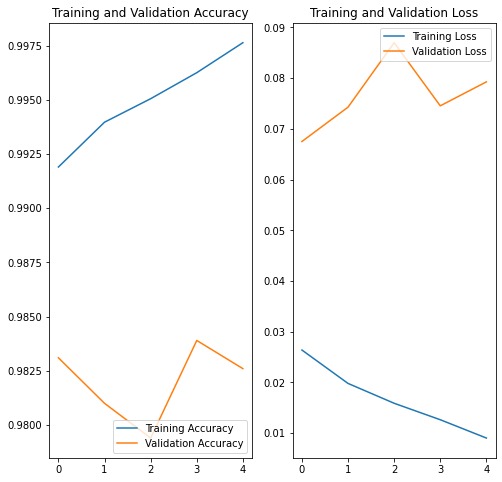

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

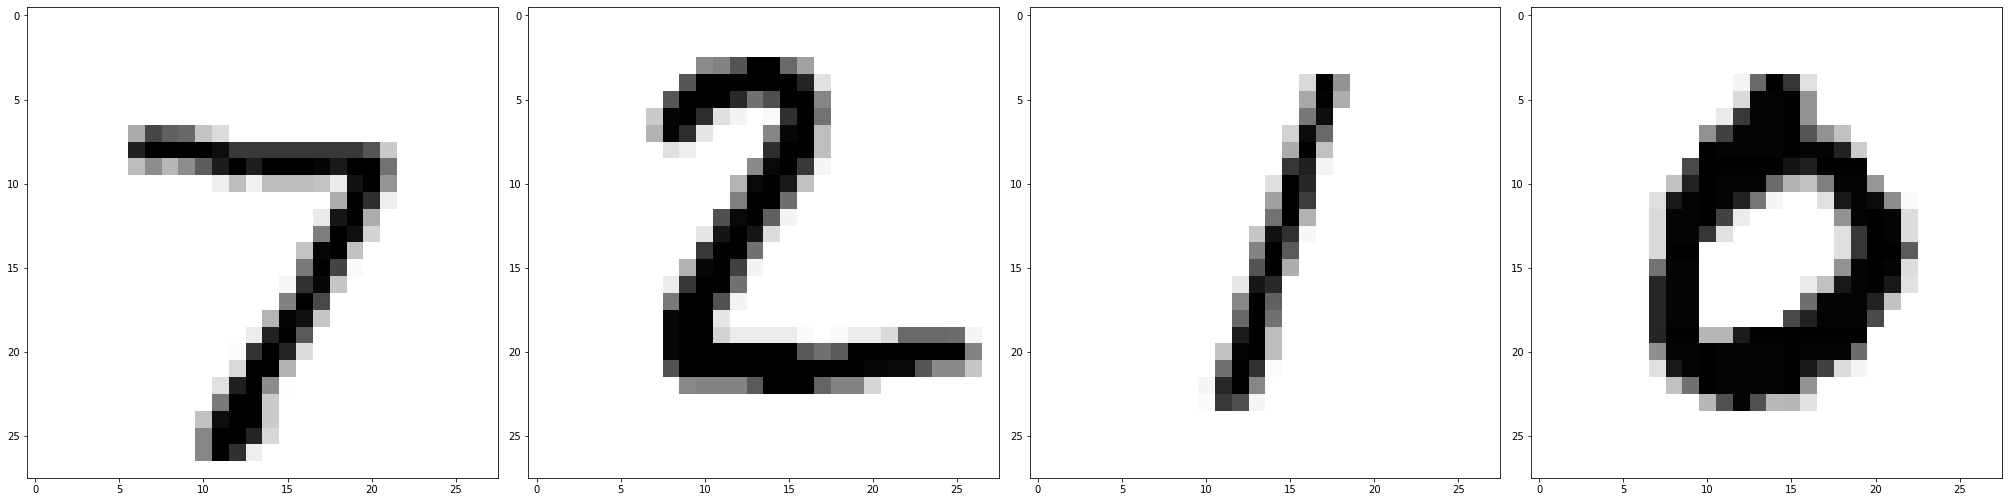

In [ ]:
plotImages(test_x[:10])  # Plot images 0-4

In [ ]:
#make predictions
predictions=model1.predict(test_x[0:5])

print(predictions.shape)
print(predictions)

print(predictions.argmax(axis=1))
print(test_y[0:5])

1/1 [==============================] - 0s 34ms/step
(5, 10)
[[4.35582593e-14 1.39655715e-17 3.65140600e-12 1.00105133e-08
  3.23333075e-20 6.01201942e-18 5.99262265e-19 1.00000000e+00
  6.19152021e-16 4.25881067e-11]
 [9.11223611e-14 7.21669557e-10 1.00000000e+00 1.20859555e-11
  1.06099368e-19 6.45146625e-15 4.50553342e-15 2.00052207e-24
  8.12416107e-12 7.38153633e-22]
 [4.32772401e-10 9.99989510e-01 1.78368202e-06 9.93369387e-10
  3.61933502e-07 3.73822662e-09 7.64665344e-08 3.73529610e-06
  4.47838147e-06 5.13963004e-11]
 [1.00000000e+00 1.76570424e-16 2.23830524e-12 3.59788064e-17
  2.57833685e-13 2.38477061e-14 1.14741050e-09 5.01522261e-12
  5.94285791e-19 4.06956017e-13]
 [3.87785937e-09 3.41958009e-14 4.02908748e-11 1.35704843e-14
  9.99945045e-01 2.24792692e-13 2.24729724e-09 2.68376041e-08
  2.73865219e-11 5.49420074e-05]]
[7 2 1 0 4]
[7 2 1 0 4]


In [ ]:
myslice=train_x[20:100]
print(myslice.shape)

myslice=train_x[20:100,:,:]
print(myslice.shape)

myslice=train_x[20:100,0:28,0:28]
print(myslice.shape)

(80, 28, 28, 1)
(80, 28, 28, 1)
(80, 28, 28, 1)


numpy broadcasting is a process to match axes/dimensions in a tensor operation by repeating the smaller tensor

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10)) 
y = np.random.random((32, 10))    
z = np.maximum(x, y)   

print(x.shape,y.shape,z.shape)

(64, 3, 32, 10) (32, 10) (64, 3, 32, 10)


In [ ]:
import tensorflow as tf
#numpy-like initializers
print(tf.ones(shape=(2,1)))
print(tf.zeros(shape=(2,1)))
#following a distribution
print(tf.random.uniform(shape=(5,1),minval=0.,maxval=1.))
print(tf.random.normal(shape=(5,1),mean=0.,stddev=1.))

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.39036548]
 [0.38542688]
 [0.43908954]
 [0.8510095 ]
 [0.7991024 ]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[ 0.00187731]
 [-1.2787402 ]
 [-0.7838358 ]
 [ 0.2576147 ]
 [ 0.18943967]], shape=(5, 1), dtype=float32)


Tensors are not assignables like numpy

In [ ]:
x=np.ones(shape=(2,2))
print(x)
x[0,0]=0
print(x)

[[1. 1.]
 [1. 1.]]
[[0. 1.]
 [1. 1.]]


In [ ]:
x=tf.ones(shape=(2,2))
x[0,0]=0

TypeError: ignored

You need to declare a tensor as variable





